In [2]:
import pandas as pd
import numpy as np

In [3]:
# загрузим данные

data = pd.read_csv("more-elements/small_data.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1000,element_1,element_2,element_3,element_1_ratio,element_2_ratio,element_3_ratio,temp,pressure,air_ratio
0,0,8.609928e-22,8.719475e-22,8.843121e-22,8.984656e-22,9.148115e-22,9.335751e-22,9.542737e-22,9.749071e-22,9.921245e-22,...,1.291454e-20,H2O,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0
1,1,5.253885e-28,5.510605e-28,5.792029e-28,6.101964e-28,6.445074e-28,6.827149e-28,7.255478e-28,7.739384e-28,8.291005e-28,...,3.734918e-28,O2,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0
2,2,8.762307e-29,1.197024e-28,1.327727e-28,1.190900e-28,1.547663e-28,2.093510e-28,3.772611e-28,9.672443e-28,8.515279e-28,...,7.068209e-27,CH4,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0
3,3,2.236306e-22,2.244983e-22,2.253853e-22,2.262925e-22,2.272214e-22,2.281737e-22,2.291511e-22,2.301553e-22,2.311854e-22,...,3.345353e-21,NH3,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0
4,4,4.925684e-21,3.898402e-21,2.119305e-21,1.167819e-21,7.593790e-22,5.659350e-22,4.648516e-22,4.100347e-22,3.816605e-22,...,8.922172e-21,H2S,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,1.642428e-20,1.721797e-20,1.714633e-20,1.954901e-20,2.063994e-20,2.097493e-20,2.400708e-20,2.570381e-20,2.570203e-20,...,3.389887e-20,HC3N,HO2,CH3CN,0.038815,0.680089,0.281096,323.0,0.775,0.0
20996,20996,9.032418e-22,1.068879e-21,1.253983e-21,1.506119e-21,1.884428e-21,2.402496e-21,2.994544e-21,3.483975e-21,3.733815e-21,...,1.558972e-20,NO+,CH3Cl,HO2,0.614105,0.072482,0.313413,323.0,0.775,0.0
20997,20997,2.545500e-20,2.693262e-20,2.849727e-20,3.015513e-20,3.189565e-20,3.364947e-20,3.525869e-20,3.658139e-20,3.765836e-20,...,1.392577e-22,NO+,CH3Cl,CH3CN,0.188443,0.233666,0.577891,323.0,0.775,0.0
20998,20998,1.057446e-20,1.120442e-20,1.184331e-20,1.252551e-20,1.330153e-20,1.419711e-20,1.519050e-20,1.615233e-20,1.693858e-20,...,1.474552e-20,NO+,HO2,CH3CN,0.467274,0.295394,0.237332,323.0,0.775,0.0


Объединили данные. Теперь проверим, что данные корректные. Нарисуем спектры и посмотрим, что получается. Для примера, возьмём H2O и посмотрим, как изменяется спектр при различных параметрах

In [4]:
from typing import List, Tuple
import matplotlib.pyplot as plt


def plot_spectras(
    spectras: List[Tuple[List[float], float]],
    param: str,
    width: float = 1,
) -> None:
    plt.figure(figsize=(15, 8))
    for spectra, param_value in spectras:
        plt.plot(spectra, label=f"{param}: {param_value}", linewidth=width)
    
    plt.xlabel("WN")
    plt.ylabel("abs. coef")

    plt.legend()
    plt.show()

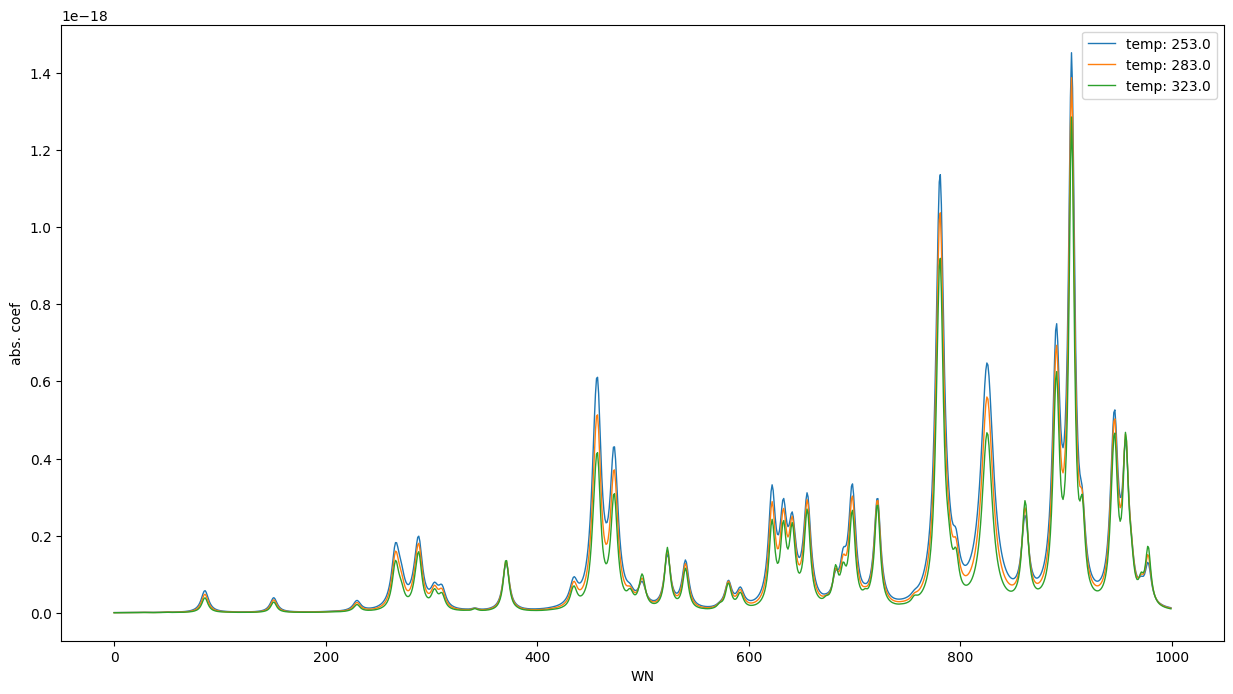

In [7]:
# посмотрим, на то, как меняется спектр в зависимости от температуры
spectras = []
temps = [253.0, 283.0, 323.0]
for temp in temps:
    spectras.append(
        (
            data[
                (data.element_1 == "H2O")
                & (data.element_2.isnull())
                & (data.element_3.isnull())
                & (data.temp == temp)
                & (data.pressure == 0.775)
                & (data.air_ratio == 0.0)
            ].to_numpy()[:, 1:1001].tolist()[0],
            
            temp
        )
    )

plot_spectras(spectras, "temp")

In [5]:
# для тех данных, что я Вам прислал, эта ячейка неактуальна

# а теперь при различных давлениях
# spectras = []
# pressures = [0.1, 0.55, 1.0]
# for p in pressures:
#     spectras.append(
#         (
#             data[
#                 (data.element_1 == "H2O")
#                 & (data.element_2.isnull())
#                 & (data.element_3.isnull())
#                 & (data.temp == 273)
#                 & (data.pressure == p)
#                 & (data.air_ratio == 0)
#             ]
#             .to_numpy()[:, :1001]
#             .tolist()[0],
#             p,
#         )
#     )

# plot_spectras(spectras, "pressure")

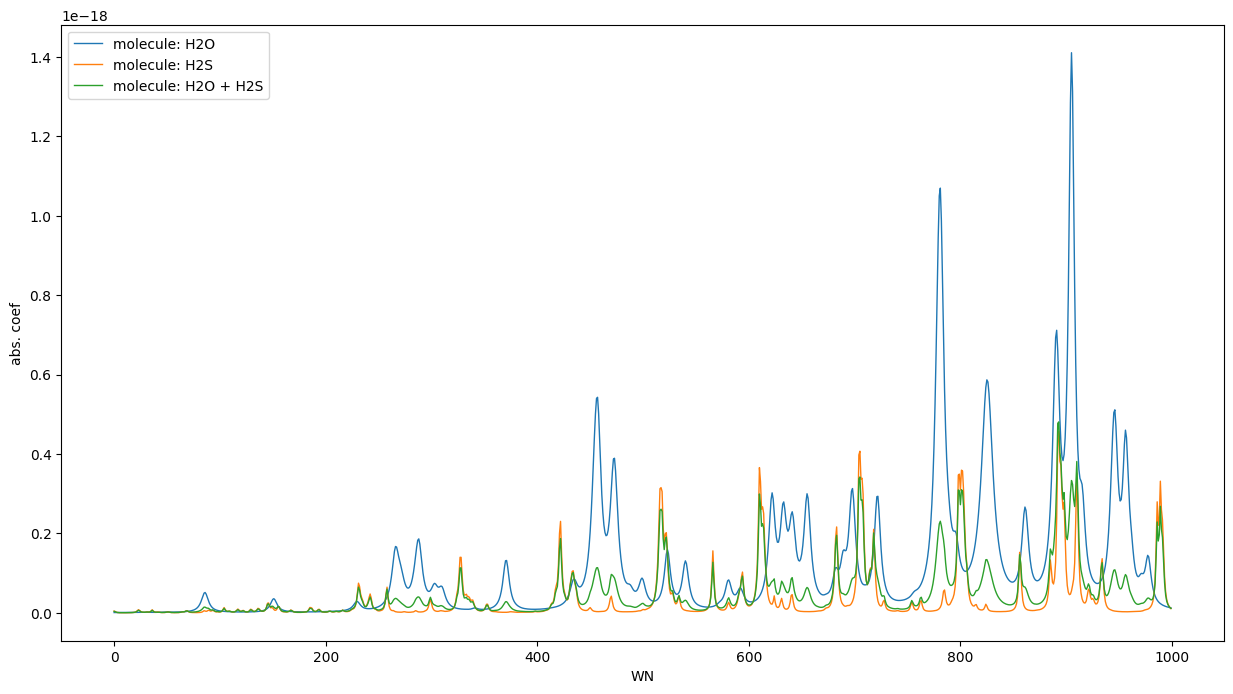

In [10]:
# можем еще посмотреть, как выглядят смеси веществ. Возьмем H2O и H2S
spectras = []

spectras.append(    # только H2O
    (
        data[
            (data.element_1 == "H2O")
            & (data.element_2.isnull())
            & (data.element_3.isnull())
            & (data.temp == 273)
            & (data.pressure == 0.775)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, 1:1001]
        .tolist()[0],
        "H2O",
    )
)

spectras.append(  # только H2S
    (
        data[
            (data.element_1 == "H2S")
            & (data.element_2.isnull())
            & (data.element_3.isnull())
            & (data.temp == 273)
            & (data.pressure == 0.775)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, 1:1001]
        .tolist()[0],
        "H2S",
    )
)

spectras.append(  # H2O + H2S
    (
        data[
            (data.element_1 == "H2O")
            & (data.element_2 == "H2S")
            & (data.element_3.isnull())
            & (data.temp == 273)
            & (data.pressure == 0.775)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, 1:1001]
        .tolist()[0],
        "H2O + H2S",
    )
)

plot_spectras(spectras, "molecule")

Как видим, спектры действительно разные. Теперь займемся классификацией. Для примера, сделаем классификатор для определения наличия H2O в смеси

In [7]:
# посмотрим, какие элементы у нас есть в данных
data.element_1.unique()

array(['H2O', 'O2', 'CH4', 'NH3', 'H2S', 'OH', 'N2O', 'CO', 'N2', 'CH3OH',
       'ClO', 'H2O2', 'SO', 'PH3', 'HCN', 'HOCl', 'H2CO', 'HI', 'HBr',
       'CS', 'HC3N', 'NO+', 'CH3Cl', 'HO2', 'CH3CN'], dtype=object)

In [8]:
# подготовим датасет - добавим целевую переменную,
# которая равна 1 если в смеси есть искомый элемент и 0 в противном случае

element_df = data.copy()
element = "H2O"

condition = (
    (element_df.element_1 == element)
    | (element_df.element_2 == element)
    | (element_df.element_3 == element)
)

element_df["is_target_present"] = np.where(condition, 1, 0)             # создал столбец с таргетом
element_df[list(map(str, range(1001)))] = np.log(
    element_df[list(map(str, range(1001)))]
)  # прологарифмировал коэф. поглощения

# получили итоговый датасет для обучения
# новая колонка - крайняя справа
element_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,element_1,element_2,element_3,element_1_ratio,element_2_ratio,element_3_ratio,temp,pressure,air_ratio,is_target_present
0,0,-48.503956,-48.491313,-48.477232,-48.461354,-48.443324,-48.423021,-48.401092,-48.379700,-48.362194,...,H2O,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0,1
1,1,-62.813415,-62.765708,-62.715900,-62.663772,-62.609067,-62.551475,-62.490626,-62.426060,-62.357211,...,O2,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0,0
2,2,-64.604508,-64.292544,-64.188914,-64.297673,-64.035636,-63.733540,-63.144615,-62.203102,-62.330521,...,CH4,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0,0
3,3,-49.852047,-49.848174,-49.844231,-49.840214,-49.836117,-49.831935,-49.827661,-49.823288,-49.818822,...,NH3,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0,0
4,4,-46.759824,-46.993720,-47.603199,-48.199149,-48.629541,-48.923563,-49.120324,-49.245801,-49.317511,...,H2S,NaN,NaN,1.000000,NaN,NaN,253.0,0.775,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,-45.555526,-45.508333,-45.512503,-45.381362,-45.327059,-45.310959,-45.175938,-45.107648,-45.107717,...,HC3N,HO2,CH3CN,0.038815,0.680089,0.281096,323.0,0.775,0.0,0
20996,20996,-48.456052,-48.287677,-48.127962,-47.944751,-47.720662,-47.477779,-47.257495,-47.106113,-47.036856,...,NO+,CH3Cl,HO2,0.614105,0.072482,0.313413,323.0,0.775,0.0,0
20997,20997,-45.117375,-45.060949,-45.004479,-44.947932,-44.891817,-44.838290,-44.791575,-44.754747,-44.725732,...,NO+,CH3Cl,CH3CN,0.188443,0.233666,0.577891,323.0,0.775,0.0,0
20998,20998,-45.995845,-45.937978,-45.882524,-45.826520,-45.766408,-45.701248,-45.633617,-45.572223,-45.524693,...,NO+,HO2,CH3CN,0.467274,0.295394,0.237332,323.0,0.775,0.0,0


In [9]:
# посмотрим, какую долю составляют смеси с наличием в них элемента
# это число я и взял как вероятность случайно угадать наличие элемента в смеси

print(f"{element}: {element_df[element_df.is_target_present == 1].shape[0] / element_df.shape[0] * 100 :.2f}%")

H2O: 11.47%


Подготовили датасет. Осталось лишь обучить классификатор и посмотреть на результаты:

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# берём за X столбцы с 0 по 1000 включительно
# за y - новый столбец с таргетом
X_train, X_test, y_train, y_test = train_test_split(
    element_df[list(map(str, range(1001)))],  # X
    element_df.is_target_present,   # y
    test_size=0.5,    # размер тестовой выборки. Взял сильно меньше 70%, но, как оказывается, и этого достаточно
    random_state=42,
)

# проверим, что таргет не просочился в X:
X_train

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
14850,-48.778003,-48.607798,-48.480606,-48.360740,-48.256174,-48.149608,-48.065261,-48.040098,-48.005478,-47.903620,...,-44.673382,-44.587875,-44.473453,-44.430391,-44.484796,-44.583025,-44.669959,-44.709205,-44.779859,-44.997034
11398,-49.203637,-49.063042,-48.946085,-48.857214,-48.791799,-48.744844,-48.708149,-48.667277,-48.610828,-48.538965,...,-47.459145,-47.482934,-47.506377,-47.529487,-47.552267,-47.574726,-47.596876,-47.618724,-47.640278,-47.661545
2768,-46.158035,-46.108204,-46.055302,-45.999073,-45.939266,-45.875642,-45.808003,-45.736221,-45.660295,-45.580417,...,-47.636964,-47.706264,-47.746281,-47.785408,-47.819805,-47.846564,-47.868542,-47.888075,-47.906051,-47.922802
2634,-47.337277,-47.171325,-47.035083,-46.931711,-46.855878,-46.800951,-46.757241,-46.710521,-46.649967,-46.575026,...,-52.470472,-52.471265,-52.472052,-52.472835,-52.473611,-52.474383,-52.475149,-52.475909,-52.476665,-52.477415
1573,-44.849150,-44.934387,-45.120774,-44.721290,-44.815424,-45.035607,-44.686649,-44.752918,-44.994730,-44.676572,...,-44.888608,-44.817235,-44.731660,-44.708416,-44.769050,-44.871190,-44.964608,-45.028264,-45.115355,-45.296471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-46.307034,-45.646089,-46.275616,-47.858460,-48.724418,-49.220079,-49.445653,-49.508912,-49.443188,-49.220355,...,-54.289950,-54.306185,-54.320767,-54.333971,-54.346001,-54.356994,-54.366873,-54.355538,-54.365381,-54.393312
11964,-47.941415,-48.166786,-48.668687,-49.019241,-49.156518,-49.167621,-49.102103,-48.979194,-48.802472,-48.564548,...,-43.970170,-44.354980,-44.962434,-45.527956,-45.973017,-46.321258,-46.601548,-46.858560,-47.086759,-47.283792
5390,-48.769211,-48.594462,-48.432887,-48.308940,-48.209581,-48.113977,-48.058615,-48.092358,-48.166415,-48.225520,...,-44.430170,-44.353058,-44.255949,-44.224936,-44.283504,-44.384527,-44.474834,-44.528431,-44.609008,-44.803798
860,-48.763441,-48.443532,-48.013479,-47.403641,-46.510777,-45.662058,-45.882924,-46.755998,-47.529394,-47.991272,...,-48.832054,-48.876277,-48.923945,-48.964154,-48.993144,-49.009861,-49.013889,-49.008821,-49.009593,-49.033939


In [11]:
# проверим, что тут лежат только типы float
X_train.dtypes[X_train.dtypes == np.float64].all()

True

In [12]:
# проверим, что все они лежат в адекватном диапазоне
((-90 < X_train) & (X_train < -37) ).all().all()

True

In [27]:
6&1

0

In [13]:
y_train

14850    0
11398    0
2768     0
2634     0
1573     0
        ..
11284    0
11964    0
5390     0
860      0
15795    1
Name: is_target_present, Length: 10500, dtype: int32

In [14]:
# собственно, сама модель.
from sklearn.model_selection import cross_val_score


clf = make_pipeline(StandardScaler(), LinearSVC(dual="auto", random_state=42, tol=1e-5))

# cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=3)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(f"accuracy: {accuracy_score(y_test, y_pred) * 100 :.2f}%")

accuracy: 99.98%


In [15]:
y_test

2312     0
16845    0
6105     0
18082    0
11335    0
        ..
5977     0
1160     0
5955     0
8967     0
13685    1
Name: is_target_present, Length: 10500, dtype: int32

In [16]:
# на всякий случай, проверю сам, вдруг функция accuracy_score дала сбой?
np.where(y_pred != y_test)

(array([1377, 9533], dtype=int64),)

In [17]:
# посмотрим, в каких случаях модель дала сбой
ind = y_test.index.values

element_df.iloc[ind[1377]][
    [
        "element_1",
        "element_2",
        "element_3",
        "element_1_ratio",
        "element_2_ratio",
        "element_3_ratio",
    ]
]

element_1               H2O
element_2               NH3
element_3              HOCl
element_1_ratio    0.003241
element_2_ratio     0.57122
element_3_ratio    0.425539
Name: 10881, dtype: object

In [21]:
element_df.iloc[ind[9533]][
    [
        "element_1",
        "element_2",
        "element_3",
        "element_1_ratio",
        "element_2_ratio",
        "element_3_ratio",
    ]
]

element_1               H2O
element_2                HI
element_3               HBr
element_1_ratio    0.000231
element_2_ratio    0.259649
element_3_ratio     0.74012
Name: 573, dtype: object

Как видим, ошибки происходят, когда H2O в смеси $<1\%$, что логично.

:(